In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('cleanerstill.csv', sep=";")

In [60]:
mask = (data['ethnicity'] != ' ') & (type(data['ethnicity']) != float) & (data['age'] != ' ') & (data['sex'] != ' ') & (data['essay0'] != ' ') & (data['essay4'] != ' ')
# mask removes all rows where ethnicity, age and sex is not given. Also removes rows where ethnicity is NaN. This particular value is not present for age and sex, hence it is not masked out.
data_new = data[mask]

data_rc = data_new.filter(['age','sex','ethnicity','essay0','essay4'], axis=1)

mask_male = (data_rc['sex'] == 'm') # creates mask of males where sex evaluates to True if == 'm'
mask_female = (data_rc['sex'] == 'f') # creates mask of females where sex evaluates to True if == 'f'

data_om = data_rc[mask_male] # only males for relevant columns
data_of = data_rc[mask_female] # only females for relevant columns

data_om_reduced = data_om.sample(frac=0.6665) # returns a random sample of data_om where parameter frac describes size of sample relative to original data

df_tmp = pd.concat([data_of, data_om_reduced], ignore_index=True)

df_final = df_tmp.sample(frac=1) # gives a random sample of df_tmp of size frac (currently 34685 obs)

In [61]:
test_data = df_final[:len(df_final)//10]
dev_data = df_final[-len(df_final)//10:]
train_data = df_final[len(df_final)//10:-len(df_final)//10]

## Visualization of classes distribution

### Gender distribution

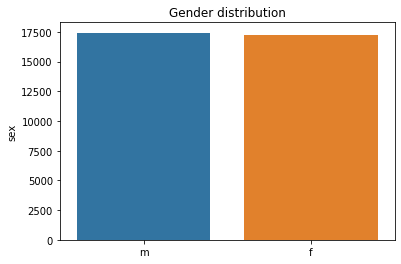

In [62]:
gender_dist = sns.barplot(x=df_final.sex.value_counts().index, y=df_final.sex.value_counts())
plt.title("Gender distribution")

plt.show();

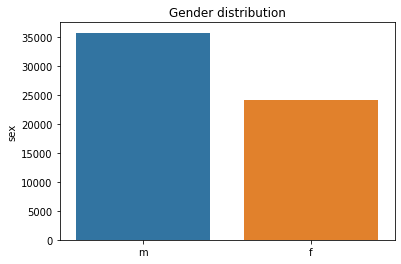

In [63]:
gender_dist = sns.barplot(x=data.sex.value_counts().index, y=data.sex.value_counts())
plt.title("Gender distribution")

plt.show();

## Ethnicity distribution

#### Balanced data

In [47]:
white = 0
n_white = 0

for row in df_final["ethnicity"]:
    if row == "white" and len(row) < 6:
        white += 1
    else:
        n_white += 1

In [54]:
print(white)
print(n_white)

21421
13264


In [48]:
x_eth = ["white", "non_white"]
y_eth = [white, n_white]

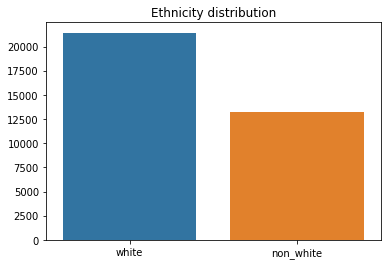

In [53]:
ethnicity_dist = sns.barplot(x=x_eth, y=y_eth)
plt.title("Ethnicity distribution")

plt.show();

#### Imbalanced data

In [64]:
white_data = 0
n_white_data = 0

for row in data["ethnicity"]:
    if row == "white" and len(row) < 6:
        white_data += 1
    else:
        n_white_data += 1

In [65]:
print(white_data)
print(n_white_data)

32829
27115


In [66]:
x_eth_data = ["white", "non_white"]
y_eth_data = [white_data, n_white_data]

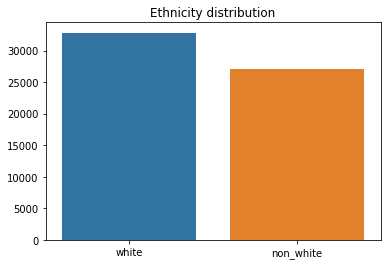

In [67]:
ethnicity_dist_data = sns.barplot(x=x_eth_data, y=y_eth_data)
plt.title("Ethnicity distribution")

plt.show();

### Age distribution

#### Balanced data

In [68]:
o_30 = 0
u_30 = 0

for row in df_final["age"]:
    if row <= 30:
        u_30 += 1
    else:
        o_30 += 1

In [69]:
print(o_30)
print(u_30)

16448
18237


In [70]:
x_age = ["Under 30", "Over 30"]
y_age = [u_30, o_30]

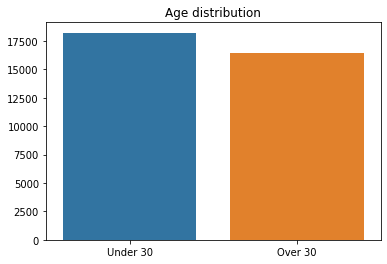

In [71]:
age_dist = sns.barplot(x=x_age, y=y_age)
plt.title("Age distribution")

plt.show();

#### Imbalanced data

In [72]:
o_30_data = 0
u_30_data = 0

for row in data["age"]:
    if row <= 30:
        u_30_data += 1
    else:
        o_30_data += 1

In [73]:
print(o_30_data)
print(u_30_data)

28054
31890


In [74]:
x_age_data = ["Under 30", "Over 30"]
y_age_data = [u_30, o_30]

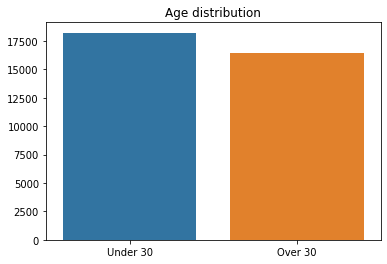

In [75]:
age_dist_data = sns.barplot(x=x_age_data, y=y_age_data)
plt.title("Age distribution")

plt.show();